# Analizando los Salarios en Ciencia de Datos en 2023

## 1- Limpieza de datos

#### 1.1 Detección y eliminación de valores duplicados:

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Se lee los primeros 10 registros del dataset 
df = pd.read_csv(filepath_or_buffer=('C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/ds_salaries.csv'))
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [373]:
#Se valida la cantidad de registros antes de eliminar duplicados si es que hay
df.value_counts().sum()

np.int64(3755)

In [374]:
# Se valida la cantidad de registros duplicados
df.duplicated().sum()

# En este punto se debe valdiar con los stakeholders si es que son registros unicos que corresponden a personas individuales
# ahí no correspondería eliminar los duplicados porque sí podría haber muchas personas con las mismas condiciones.

# Para este análisis se consideran duplicados ya que no tenemos un id que identifique a cada persona para saber si un registro con las mismas condiciones corresponde o no a la misma persona

np.int64(1171)

In [375]:
# Luego de validar que existen 1171 duplicados, se procede a la eliminación, manteniendo el primer registro.
df = df.drop_duplicates(keep='first')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Fueron eliminados 1.171 registros duplicados. Como fuente se obtuvo el uso de drop_duplicate de la doc oficial de pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

In [376]:
# Se valida la cantidad de registros posterior a la eliminación de valores duplicados
df.value_counts().sum()

np.int64(2584)

#### 1.2 Verificación y ajuste de tipos de datos:

In [377]:
df_dict = df.info()
# Se verifica los datos del dataframe y sus tipos de datos.

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [378]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Se verifican los tipos de datos de las diferentes columnas, y se ven correctos.

#### 1.3 Consistencia en valores categóricos:

In [379]:
# Se imprimen la cantidad por cada valor categorico para ver si hay un mismo valor escrito de diferentes maneras.
df_objects = df.select_dtypes(object)
print(df_objects['experience_level'].value_counts())
print(df_objects['employment_type'].value_counts())
print(df_objects['company_size'].value_counts())

experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64
employment_type
FT    2547
PT      17
CT      10
FL      10
Name: count, dtype: int64
company_size
M    2028
L     409
S     147
Name: count, dtype: int64


En los valores categoricos no se observan inconsistencias

#### 1.4 Manejo de valores faltantes:

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [381]:
print(df.isnull().sum())
# de la plataforma, en el apartado "Limpieza de datos y manejo de datos faltantes (Nulos)"

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


No se observan valores faltantes en el dataset

#### 1.5 Detección de datos anómalos:

In [382]:
# se observa cual es el salario promedio total
df[['salary_in_usd']].mean()

salary_in_usd    133409.280186
dtype: float64

In [383]:
# Se observa cual es la cantidad de registros por cada tipo de empleado
df[['employment_type']].value_counts()

employment_type
FT                 2547
PT                   17
FL                   10
CT                   10
Name: count, dtype: int64

C:\Users\sebac\AppData\Local\Temp\ipykernel_8568\3351030638.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([salariosFT, salariosPT ,salariosFL, salariosCT], labels= ['FT','PT','FL','CT']);


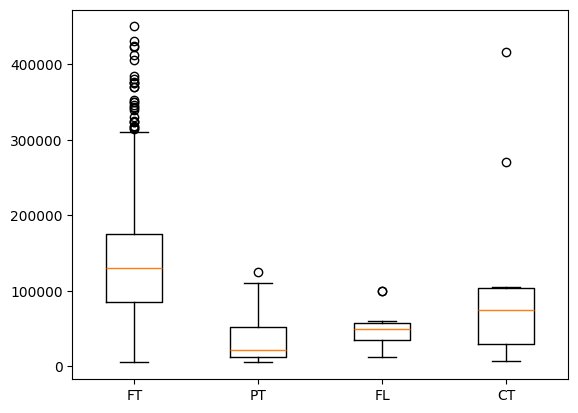

In [384]:
# Se observa el salario promedio por cada tipo de empleado y se grafica para ver los outliers
salariosFT = df.loc[df['employment_type']=='FT','salary_in_usd'].values
salariosPT = df.loc[df['employment_type']=='PT','salary_in_usd'].values
salariosFL = df.loc[df['employment_type']=='FL','salary_in_usd'].values
salariosCT = df.loc[df['employment_type']=='CT','salary_in_usd'].values
plt.boxplot([salariosFT, salariosPT ,salariosFL, salariosCT], labels= ['FT','PT','FL','CT']);

# La fuente fue el apartado de pandas de la plataforma
# https://codingdojolatam.la/cursos/data-science-fundamentals-mitic-b-septiembre-2024/leccion/pandas-para-ciencia-de-datos-filtrado-y-slicing-en-pandas-4-2/

In [385]:
# Se observa el salario medio y máximo por tipo de empleado
salario_medio_por_tipo_empleado = df.groupby(['employment_type'])[['salary_in_usd']].mean()
print("Salario medio por tipo de empleado: ", salario_medio_por_tipo_empleado)

salario_maximo_por_tipo_empleado = df.groupby(['employment_type'])[['salary_in_usd']].max()
print("Salario maximo por tipo de empleado: ", salario_maximo_por_tipo_empleado)

Salario medio por tipo de empleado:                   salary_in_usd
employment_type               
CT               113446.900000
FL                51807.800000
FT               134434.613271
PT                39533.705882
Salario maximo por tipo de empleado:                   salary_in_usd
employment_type               
CT                      416000
FL                      100000
FT                      450000
PT                      125404


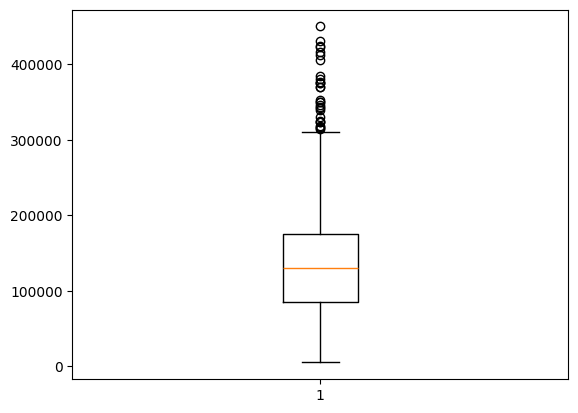

In [386]:
# Se grafica el boxplot por el salario medio total para identificar los outliers sobre el total
salarios_outliers = df['salary_in_usd']
plt.boxplot([salarios_outliers]);

In [387]:
# Se observa la cantidad de registros que son outliers
df[df['salary_in_usd'] > 300000].info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 33 to 3750
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           35 non-null     int64 
 1   experience_level    35 non-null     object
 2   employment_type     35 non-null     object
 3   job_title           35 non-null     object
 4   salary              35 non-null     int64 
 5   salary_currency     35 non-null     object
 6   salary_in_usd       35 non-null     int64 
 7   employee_residence  35 non-null     object
 8   remote_ratio        35 non-null     int64 
 9   company_location    35 non-null     object
 10  company_size        35 non-null     object
dtypes: int64(4), object(7)
memory usage: 3.3+ KB


In [388]:
# Se filtran los outliers para limpiar la base
df_filtrado = df[df['salary_in_usd'] < 300000]
df_filtrado.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2542 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2542 non-null   int64 
 1   experience_level    2542 non-null   object
 2   employment_type     2542 non-null   object
 3   job_title           2542 non-null   object
 4   salary              2542 non-null   int64 
 5   salary_currency     2542 non-null   object
 6   salary_in_usd       2542 non-null   int64 
 7   employee_residence  2542 non-null   object
 8   remote_ratio        2542 non-null   int64 
 9   company_location    2542 non-null   object
 10  company_size        2542 non-null   object
dtypes: int64(4), object(7)
memory usage: 238.3+ KB


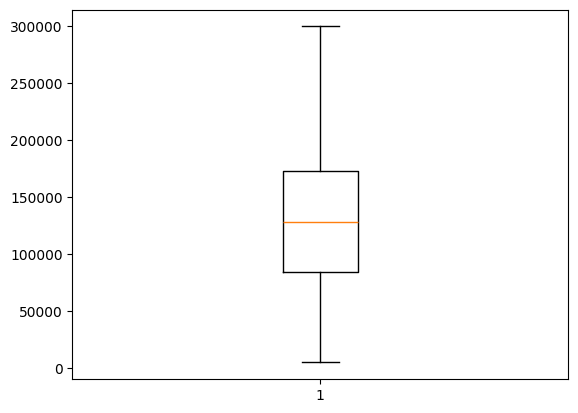

In [389]:
df_filtrado['salary_in_usd'] # values para transformación a arreglo numpy
plt.boxplot([df_filtrado['salary_in_usd']]);

Se identificaron 35 registros ya como outliers, que fueron excluidos y luego se visualiza el boxplot posterior a la limpieza

## 2- Exploración de datos con Python:

### 2.1 Visualización Univariada

Text(0.5, 1.0, 'Histograma de Salarios')

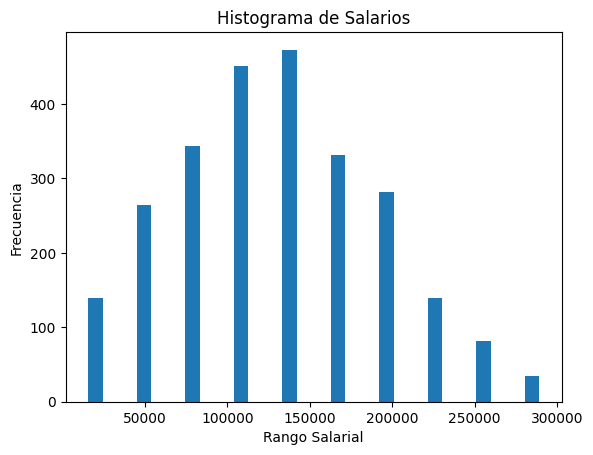

In [394]:
# Se realiza un historgrama sobre la base limpia para identificar los rangos salariales más frecuentes

num_bins = 10
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1) 

ax1.hist(df_filtrado['salary_in_usd'], num_bins, density=False, rwidth=0.3)

ax1.set_xlabel("Rango Salarial")
ax1.set_ylabel("Frecuencia")
ax1.set_title("Histograma de Salarios")

#El código se trajo del repositorio de https://github.com/polivares/CD-DataScience/tree/2024-2/3-Matplotlib 

In [309]:
# Se obtiene el dato de cantidad de trabajos de este tipo, por año
df[['work_year']].value_counts()

work_year
2023         1156
2022         1125
2021          228
2020           75
Name: count, dtype: int64

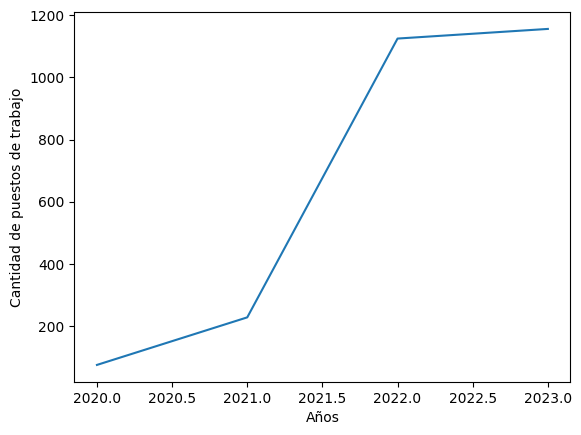

In [397]:
# Acá se genera el gráfico utilizando plot, con los datos obtenidos en el fragmento de codigo anterior
plt.plot([2020, 2021, 2022, 2023],[75,228,1125,1156]) # Se grafican 4 puntos

plt.ylabel("Cantidad de puestos de trabajo")
plt.xlabel("Años")
plt.show()

#El código se trajo del repositorio de https://github.com/polivares/CD-DataScience/tree/2024-2/3-Matplotlib 

### 2.2 Visualización Multivariada

In [325]:
# Se cuentan los registros por nivel de experiencia
df_experience = df[['experience_level']].value_counts()
df_experience

experience_level
SE                  1554
MI                   664
EN                   270
EX                    96
Name: count, dtype: int64

In [398]:
# Se ve el salario promedio por el nivel de experiencia
salario_medio_por_experiencia = df.groupby(['experience_level'])[['salary_in_usd']].mean()
print(salario_medio_por_experiencia)

                  salary_in_usd
experience_level               
EN                 72648.685185
EX                191078.208333
MI                101828.783133
SE                153897.435650


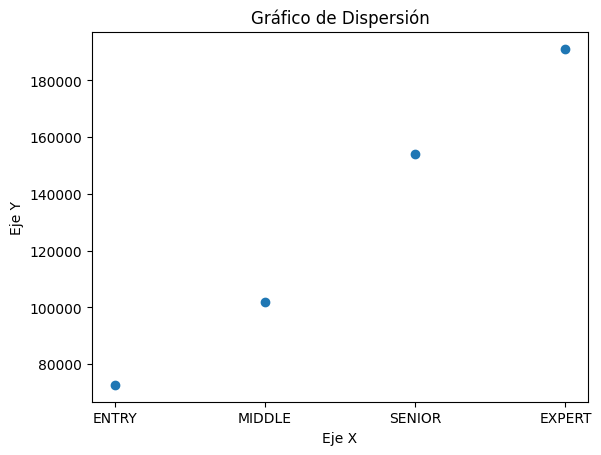

In [404]:
# Se realiza un grafico de dispersion con los datos anteriores para ver la relación entre el salario promedio y el nivel de experiencia
plt.scatter(['ENTRY','MIDDLE','SENIOR','EXPERT'],[72648, 101828, 153897, 191078])
plt.title("Gráfico de Dispersión")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show()

#El código se trajo del repositorio de https://github.com/polivares/CD-DataScience/tree/2024-2/3-Matplotlib 

In [346]:
# Se obtienen todos los registros donde el puesto sea el de Data Scientist
df_data_scientist = df[df['job_title'] == 'Data Scientist']

# Se agrupan los salarios medios por tamaño de compañia
salario_medio_data_scientist = df_data_scientist.groupby(['company_size'])[['salary_in_usd']].mean()
salario_medio_data_scientist

,salary_in_usd
company_size,
L,102287.247191
M,144437.209026
S,58167.785714


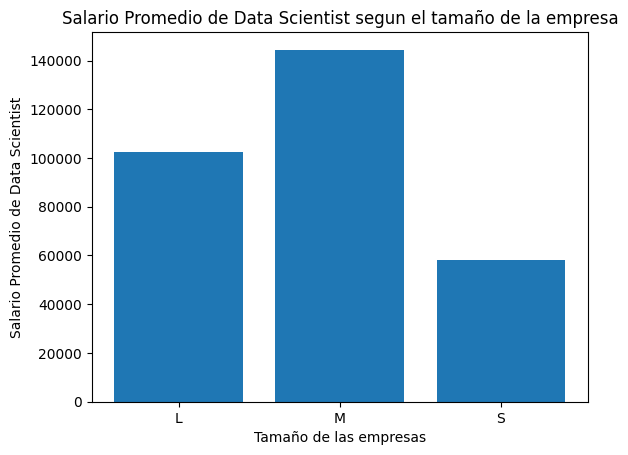

In [405]:
# Se crea un gráfico de barras para ver el salario medio de los data scientist segun el tamaño de las empresas
fig, ax = plt.subplots()

size_company = ['L', 'M', 'S']
salary_mean_data_scientist = [102287, 144437, 58167]

ax.bar(size_company, salary_mean_data_scientist)

ax.set_ylabel('Salario Promedio de Data Scientist')
ax.set_xlabel('Tamaño de las empresas')
ax.set_title('Salario Promedio de Data Scientist segun el tamaño de la empresa')

plt.show()

## 3- Análisis adicional

In [407]:
# Se des
df_filtrado.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2542.000000,2.542000e+03,2542.000000,2542.000000
mean,2022.300157,2.077353e+05,129899.244296,50.590087
std,0.747021,8.140949e+05,61584.621639,48.162272
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84000.000000,0.000000
50%,2022.000000,1.322000e+05,128029.000000,50.000000
75%,2023.000000,1.800000e+05,172471.500000,100.000000
max,2023.000000,3.040000e+07,299500.000000,100.000000


In [411]:
# Se filtran solo por las columnas con tipo de dato numérico
df_numbers = df_filtrado.select_dtypes(int)
df_numbers

,work_year,salary,salary_in_usd,remote_ratio
0,2023,80000,85847,100
1,2023,30000,30000,100
2,2023,25500,25500,100
3,2023,175000,175000,100
4,2023,120000,120000,100
...,...,...,...,...
3749,2021,165000,165000,100
3751,2021,151000,151000,100
3752,2020,105000,105000,100
3753,2020,100000,100000,100


In [413]:
# Se exploran los datos del df numerico
df_numbers.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2542.000000,2.542000e+03,2542.000000,2542.000000
mean,2022.300157,2.077353e+05,129899.244296,50.590087
std,0.747021,8.140949e+05,61584.621639,48.162272
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84000.000000,0.000000
50%,2022.000000,1.322000e+05,128029.000000,50.000000
75%,2023.000000,1.800000e+05,172471.500000,100.000000
max,2023.000000,3.040000e+07,299500.000000,100.000000


In [418]:
# Se analizan las correlaciones,
# Cálculo de la correlación Pearson
correlation_matrix = df_numbers.corr(method='pearson')
print(correlation_matrix)

# Cálculo de la correlación de Spearman
spearman_corr = df_numbers.corr(method='spearman')
print(spearman_corr)

# Código obtenido de: https://codingdojolatam.la/cursos/data-science-fundamentals-mitic-b-septiembre-2024/leccion/visualizacion-para-ciencia-de-datos-heatmap-y-correlacion-4-2/

               work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.100584       0.265087     -0.215490
salary         -0.100584  1.000000      -0.060590      0.027591
salary_in_usd   0.265087 -0.060590       1.000000     -0.086049
remote_ratio   -0.215490  0.027591      -0.086049      1.000000
               work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000  0.151517       0.241425     -0.229652
salary          0.151517  1.000000       0.834795     -0.037600
salary_in_usd   0.241425  0.834795       1.000000     -0.079713
remote_ratio   -0.229652 -0.037600      -0.079713      1.000000


No se observan correlaciones fuentes entre las variables analizadas, salvo el de salario y salario en usd, pero que solo se debe a la unificación de la moneda.

Pensaba que podría haber una correlación entre el salario y el trabajo remoto, pero los datos indican que el tipo de trabajo, ya sea remoto, hibrido o presencial, no influye en el salario.

# CONCLUSION

- Los principales rangos salariales en Ciencia de datos, rondan entre los 110K y 140K anuales.
- A medida que sube el nivel de experiencia, sube considerablemente el salario promedio.
- El salario promedio de los puestos exclusivamente nombrados como Data Scientist, varía bastante según el tipo de empresa, pudiendo ser 60K para empresas "S", y más del doble para empresas "M", que rondan los 145K anuales.
- Desde el 2020 hubo un gran incremento de estos tipos de trabajo, creciendo año a año, y principalmente de 2021 a 2022, y reduciendose en 2023 pero aún con una tendencia alcista.